# INSTA BOT 2

In [2]:
# importing required libraries 
#starting webdriver session 
# opening instagram wepage
# Login with instagram handle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
driver = webdriver.Chrome(executable_path = '/webdrivers/chromedriver')
driver.get('https://www.instagram.com/')
wait = WebDriverWait(driver,10)
def insta_login() :
    usename =  'bitpro_bot'
    password = 'gaurav@123'
    box = driver.find_elements_by_class_name('_2hvTZ')
    username_box ,pass_box= box[0] ,box[1]
    username_box.send_keys(usename)
    pass_box.send_keys(password)
    pass_box.submit()
    #Explicit wait until presence of home button and clicking on home for avoiding save info option
    wait = WebDriverWait(driver,15)
    home = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_8-yf5 ')))
    home.click()
    # explicit wait for turn on notification option and clicking on not now
    not_now = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'HoLwm ')))
    not_now.click()
time.sleep(3)
insta_login()

In [19]:
# definig our open profile function which will open any user profile
def open_profile(prof) :
    search_bar  = driver.find_element_by_class_name('x3qfX')
    search_bar.clear()
    search_bar.send_keys(prof)
    # explicit wait until all insta handle get loaded
    wait = WebDriverWait(driver,30)
    profile = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'Ap253')))
    profile.click()
driver.refresh()

##  1 > Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1 .From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and      find the top 5 which have the highest number of followers

2 .Now Find the number of posts these handles have done in the previous 3 days.

3 .Depict this information using a suitable graph.

### 1 >  1 .From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and      find the top 5 which have the highest number of followers

In [6]:
# First we are finding first 10 handles when we searched food in search bar
def search_food() :
    search_bar  = driver.find_element_by_class_name('x3qfX')
    search_bar.send_keys("food")
    # explicit wait until all insta handle get loaded
    wait = WebDriverWait(driver,20)
    wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'Ap253')))
    all_results = driver.find_elements_by_class_name('Ap253')
    insta_handle = []
    for i in all_results :
        s = i.text
        if(s[0]!= '#') :
           # print(s)
           insta_handle.append(s)
    search_bar.clear()
    driver.refresh()
    return insta_handle[:10]
food_handle = search_food()

In [11]:
# Now our main function for finding top5 handles will start from here
top_account = []
followers_value = []
def top5_handles() :
    followers_count = []
    for i in food_handle :
        open_profile(i)
        if(i == 'food') :
            driver.get('https://www.instagram.com/food/')
        followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY ')))
        count = followers[1].get_attribute('title').replace(',','')
        followers_count.append([i,float(count)])
        driver.back()
        if(i == 'food') :
            driver.get('https://www.instagram.com/')
    followers_count =sorted(followers_count,key=lambda x: (x[1]),reverse = True)
    for i in followers_count[:5] :
        top_account.append(i[0])
        followers_value.append(i[1])
top5_handles()
for i in range(5) :
    print(top_account[i],'-->',int(followers_value[i]))

buzzfeedfood --> 3662635
yourfoodlab --> 1399369
dilsefoodie --> 613999
foodtalkindia --> 302263
foodiesince96 --> 257985


### 1 > 2 . Now Find the number of posts these handles have done in the previous 3 days.

In [21]:
# in this function we will find number of posts top 5 handles have done in previous 3 days
def numberof_posts() :
    posts_no = []
    for i in top_account :
        open_profile(i)
        count =1
        condition = True
        time.sleep(5)
        wait = WebDriverWait(driver,30)
        first_post =wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'_9AhH0')))
        first_post.click()
        while condition :
            time.sleep(2)
            next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next.click()
            path = '//span[@class ="fr66n"]/button'
            wait = WebDriverWait(driver,15)
            wait.until(EC.presence_of_element_located((By.XPATH,path)))
            post_time = driver.find_element_by_class_name('_1o9PC').text.split(' ')
            sumi = True
            pt = post_time[1][0]
            if(pt != 'H' and pt != 'S' and pt != 'D' ) :
                 sumi = False
            if(pt == 'D' and float(post_time[0])>3) :
                 sumi = False
            if ( not sumi ) :
                 driver.find_elements_by_class_name('wpO6b ')[-1].click()
                 condition = False
                 break
            count += 1
            #print(post_time," ",count)
        posts_no.append(count)
        driver.get('https://www.instagram.com')
    return posts_no
post_count = numberof_posts()
print(post_count)

[20, 4, 8, 5, 7]


### 1 > 3 .Depict this information using a suitable graph.

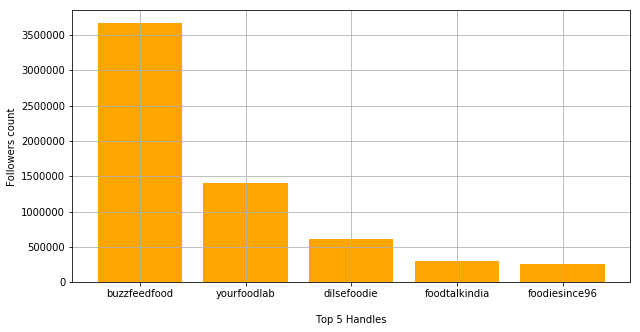

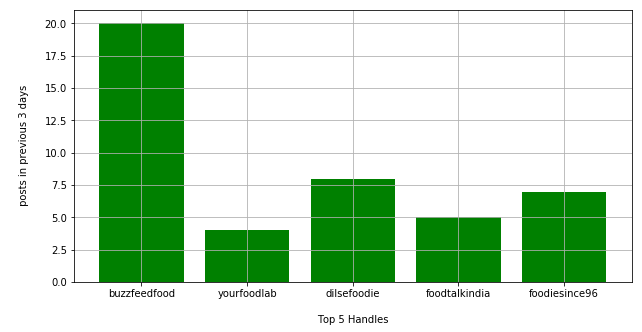

In [22]:
plt.figure(figsize =(10, 5))
followers = []
plt.grid()
plt.xlabel('\nTop 5 Handles')
plt.ylabel('Followers count')
plt.bar(top_account,followers_value,color ='orange')
plt.show()
plt.figure(figsize =(10, 5))
plt.xlabel('\nTop 5 Handles')
plt.ylabel('\n posts in previous 3 days\n')
plt.grid()
plt.bar(top_account,post_count,color ='green')
plt.show()

## 2 >Your friend also needs a list of hashtags that he should use in his posts.
1 .Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

2 .Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

3 .Create a csv file with two columns : the word and its frequency

4 .Now, find the hashtags that were most popular among these bloggers

5 .Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

### 2 > 1 .Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.


In [23]:
top_account = ['buzzfeedfood','yourfoodlab','dilsefoodie','foodtalkindia','foodiesince96']

In [25]:
# Scraping the content of first 10 posts of each handle
def scrap_data() :
    content = []
    for i in top_account :
        open_profile(i)
        count =0
        time.sleep(4)
        while True :
            if count == 0 :
                current_height = driver.execute_script('return document.body.scrollHeight;')
                driver.execute_script('window.scrollTo(0,arguments[0]);',current_height/3)
                wait = WebDriverWait(driver,30)
                first_post =wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0')))
                first_post.click()
            wait = WebDriverWait(driver,30)
            path = '/html/body/div[4]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span'
            data = wait.until(EC.presence_of_element_located((By.XPATH,path)))
            data = BeautifulSoup(data.get_attribute('innerHTML'),'html.parser')
            content.append(data.get_text())
            count += 1
            if(count>=10) :
                break;
            next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next.click()
        driver.get('https://www.instagram.com')
    return content
all_content = scrap_data()
print(all_content)

['Quick: Orange chicken or cauliflower gnocchi? Link in bio 🧐', 'Life tastes better in the fall. Link in bio 👆', "It's not all just tacos. Link in bio 🧠", "I'm craving alllll of this. Link in bio ⬆️", "America can keep its pumpkin pie, s'mores and snickerdoodles. Link in bio ⬆️", "Jo says it's the most requested dessert in her house — and after making it, I can see why. Link in bio 🍫", 'Your taste in cheese reveals more than you know! Link in bio 🥺', 'You know what they say — you are what you eat! Link in bio 👆', 'From Fiji to Libya. Link in bio 👀', "'Tis the season to stock up on a ton of wine. Link in bio 🍷", 'Soya Chaap Makhani by Chef @sanjyotkeer...Tandoori chaap in Makhani gravy just is a delicious, perfect dish. It’s a great option for peeps who are vegetarian but want to try something really close to a butter chicken (Yes I love butter chicken and I would never compare it to anything, but yes this one just tasted amazing, NO CONTROVORSIES PLEASE😋) Off lately I have cooked a few

### 2 > 2 .Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.


In [26]:
all_words = []
for i in all_content :
     for j in i.split() :
            all_words.append(j.strip())
all_words = np.array(all_words)
df = pd.DataFrame(all_words)
words = df[0].value_counts().index
frequency = df[0].value_counts().values
print('\twords',' ','frequency')
for i in range(len(words)) :
    print(words[i],'->',frequency[i])

	words   frequency
the -> 84
and -> 81
to -> 63
a -> 53
is -> 48
in -> 45
of -> 41
I -> 39
you -> 37
this -> 37
for -> 31
it -> 25
have -> 25
with -> 25
your -> 23
recipe -> 19
- -> 17
that -> 17
be -> 16
on -> 15
out -> 15
cook -> 15
just -> 14
or -> 13
my -> 13
can -> 13
& -> 12
do -> 12
i -> 12
but -> 12
delicious -> 11
* -> 11
love -> 11
by -> 11
Link -> 10
bio -> 10
don’t -> 10
chicken -> 10
are -> 10
some -> 10
what -> 10
all -> 10
will -> 10
mutton -> 10
try -> 9
an -> 9
also -> 9
not -> 9
more -> 9
Dhawan -> 8
from -> 8
#sanjyotkeer -> 8
me -> 8
used -> 8
#foodstagram -> 8
dad -> 8
#foodporn -> 8
they -> 8
Mehak -> 8
he -> 8
#streetfood -> 8
one -> 8
now -> 8
#foodie -> 8
#indianfood -> 7
updatesYouTube -> 7
so -> 7
Foodiesince96 -> 7
The -> 7
at -> 7
Snapchat -> 7
@foodiesince96 -> 7
as -> 7
sheera -> 7
💫💫 -> 7
home -> 6
This -> 6
1 -> 6
#foodiesince96..Follow -> 6
chaap -> 6
always -> 6
Makhani -> 6
pineapple -> 6
has -> 6
know -> 6
Chef -> 6
different -> 6
#foodphotography -

Bhandar -> 1
beyond -> 1
☕️Taking -> 1
#karma -> 1
apple -> 1
heaven! -> 1
down -> 1
Hope -> 1
Peeps! -> 1
pie, -> 1
@whiteonricecouple -> 1
Season -> 1
Aane -> 1
#huffposttaste -> 1
🧠 -> 1
sourdough -> 1
forget -> 1
Burgs -> 1
#durga -> 1
in. -> 1
unveiled -> 1
longer. -> 1
well -> 1
utmost -> 1
quiz -> 1
changed -> 1
#mondaymotivation -> 1
Insta -> 1
more, -> 1
each -> 1
Happy -> 1
Anyone -> 1
@princechaatbhandar#dilsefoodie -> 1
To -> 1
Janak -> 1
cream. -> 1
dine -> 1
#Pujo -> 1
#powerful -> 1
anything -> 1
!! -> 1
apart -> 1
blessing -> 1
( -> 1
lotus -> 1
able -> 1
loads -> 1
Di -> 1
😉.Call -> 1
evening -> 1
Favourite -> 1
peasy -> 1
#picoftheday -> 1
see -> 1
❤️❤️ -> 1
chopped -> 1
trimmed -> 1
can’t -> 1
specialty -> 1
expert, -> 1
world. -> 1
rice.Recipe -> 1
Unlimited -> 1
#goodday -> 1
tell -> 1
flavours -> 1
.What -> 1
mankind -> 1
bars -> 1
..Push -> 1
Directions:.In -> 1
publicists' -> 1
Rani -> 1
...#recipe -> 1
ordering -> 1
HERE -> 1
ON -> 1
minute. -> 1
cloves, -> 1
N

### 2 > 3 .Create a csv file with two columns : the word and its frequency


In [27]:
dc= {'words' :words ,'frequency' : frequency}
df = pd.DataFrame(dc)
df.to_csv('Frequency_of_words.csv',index = False)
# here we are printing 10 words and their frequency
df[100:110]

,words,frequency
100,which,5
101,until,5
102,food,5
103,garlic,5
104,masala,5
105,#indiancuisine,5
106,#instafood,5
107,butter,5
108,we,5
109,really,5


### 2 > 4 .Now, find the hashtags that were most popular among these bloggers


In [28]:
# finding all the hashtags and their counts
all_hashtags = []
for i in all_content :
     for j in i.split() :
            value = j.strip()
            if(value[0] == '#') :
                all_hashtags.append(value)
all_hshtags = np.array(all_hashtags)
df = pd.DataFrame(all_hashtags)
hashtags = df[0].value_counts().index
frequency = df[0].value_counts().values
# here we are printing top 20 hashtags of all the hashtags we have found 
for i in range(20) :
    print(hashtags[i],'->',frequency[i])

#foodstagram -> 8
#sanjyotkeer -> 8
#foodie -> 8
#foodporn -> 8
#streetfood -> 8
#indianfood -> 7
#foodphotography -> 6
#foodiesince96..Follow -> 6
#foodblogger -> 5
#indiancuisine -> 5
#nomnom -> 5
#instafood -> 5
#hungry -> 5
#delhigram -> 4
#eeeeeats -> 4
#feedfeed -> 4
#mumbaifoodie -> 4
#foodgasm -> 4
#eatingforinsta -> 3
#ilovefood -> 3


### 2 > 5 .Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

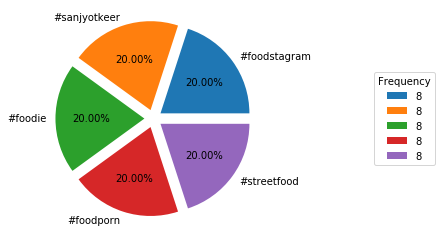

In [29]:
explode = (0.1, 0.1, 0.1,0.1,0.1) 
fig, ax = plt.subplots(figsize =(5, 4)) 
ps = plt.pie(frequency[:5],labels=hashtags[:5],explode = explode,autopct="%.2f%%")
plt.axis('equal')
ax.legend(ps[0],frequency[:5],loc ="right", bbox_to_anchor =(1.03, 0, 0.5, 1),title = 'Frequency')
plt.show()

# 3 .You need to also calculate average (followers : likes)  ratio for the obtained handles.
## (Followers : Likes ) ratio is calculated as follows :
1 . Find out the likes of the top 10 posts of the 5 handles obtained earlier.

2 .Calculate the average likes for a handle.

3 . Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

4 .Create a bar graph to depict the above obtained information.

### 3 >  1 . Find out the likes of the top 10 posts of the 5 handles obtained earlier.


In [32]:
# Scraping the content of first 10 posts of each handle
def find_likes() :
    all_likes = []
    for i in top_account :
        likes = []
        open_profile(i)
        count =0
        time.sleep(5)
        while True :
            if count == 0 :
                current_height = driver.execute_script('return document.body.scrollHeight;')
                driver.execute_script('window.scrollTo(0,arguments[0]);',current_height/3)
                wait = WebDriverWait(driver,30)
                first_post =wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'_9AhH0')))
                first_post.click()
            wait = WebDriverWait(driver,20)
            try :
                 path = '/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/button/span'
                 data = wait.until(EC.presence_of_element_located((By.XPATH,path)))
                 data =data.text
            except :
                 clc = driver.find_element_by_class_name('vcOH2')
                 driver.execute_script("arguments[0].click()", clc)
                 path = '/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span'
                 data = driver.find_element_by_xpath(path)
                 data =data.text
                 time.sleep(1)
                 driver.execute_script("arguments[0].click()", clc)
            data = int(float(data.replace(',','')))
            likes.append(data)
            count += 1
            if(count>=10) :
                break;
            next=driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next.click()
        all_likes.append(likes)
        driver.get('https://www.instagram.com')
    return all_likes
all_likes = find_likes()
print(all_likes)

[[585, 1013, 1590, 751, 1067, 2326, 1511, 1135, 1663, 1458], [19909, 29711, 40143, 31960, 23214, 31878, 36353, 50476, 29754, 27712], [2433, 5936, 3706, 9599, 3176, 4055, 5755, 6768, 8243, 4513], [639, 1748, 576, 177, 2442, 1332, 666, 446, 1011, 817], [2228, 1059, 1002, 3396, 3015, 2634, 5737, 2279, 2098, 241]]


### 3 >  2 .Calculate the average likes for a handle.

In [34]:
all_likes = np.array(all_likes)
def cal_avglike() :
    avg = []
    for i in all_likes :
        avg.append(i.sum()/10)
    return avg
avg=cal_avglike()
for i in range(5) :
    print(top_account[i],' ',avg[i])

buzzfeedfood   1309.9
yourfoodlab   32111.0
dilsefoodie   5418.4
foodtalkindia   985.4
foodiesince96   2368.9


### 3 >  3 . Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [37]:
def  avg_followers() :
    ratio = []
    for i in range(5) :
        ratio.append(followers_value[i]/avg[i])
    return ratio
avg_follow = avg_followers()
for i in range(5) :
    print(top_account[i],' ',avg_follow[i])

buzzfeedfood   2796.1180242766623
yourfoodlab   43.579116190713464
dilsefoodie   113.317399970471
foodtalkindia   306.7414248021108
foodiesince96   108.9049769935413


### 3 > 4 .Create a bar graph to depict the above obtained information.

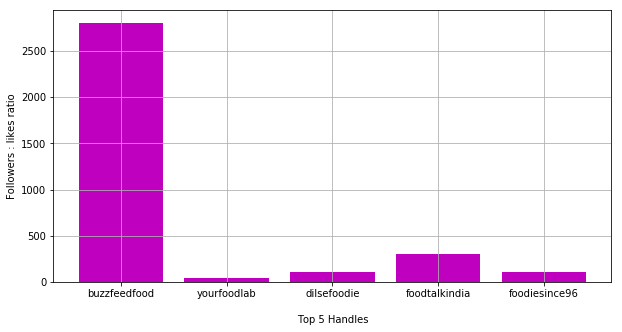

In [38]:
plt.figure(figsize =(10, 5))
followers = []
plt.grid()
plt.xlabel('\nTop 5 Handles')
plt.ylabel('Followers : likes ratio')
plt.bar(top_account,avg_follow,color ='m')
plt.show()